In [ ]:
#pip install shapely

In [ ]:
#pip install geopandas

# Creating a World Map

In [1]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import pandas as pd
import numpy as np

In [4]:
import random

n = 11980382 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s))

df = pd.read_csv('gps.csv', index_col=0, skiprows=skip)

,diffSecs,latitude,longitude,altitude,time,PK
121,1.059,42.881774,-71.552764,50.000000,2011-12-20 11:55:33,0
228,0.816,42.882015,-71.553456,50.000000,2011-12-20 11:57:29,0
313,1.309,42.881639,-71.553083,71.500000,2011-12-20 11:59:00,0
873,1.004,42.881699,-71.552943,60.200001,2011-12-20 12:08:22,0
933,0.869,42.881700,-71.552948,61.700001,2011-12-20 12:09:22,0
...,...,...,...,...,...,...
8624723,1.166,42.438456,-71.669084,62.200001,2012-03-02 19:10:33,1
8624974,0.927,42.438521,-71.669021,57.000000,2012-03-02 19:14:48,1
8625327,0.897,42.438957,-71.669177,55.900002,2012-03-02 19:20:49,1
8625383,1.096,42.438705,-71.669075,55.900002,2012-03-02 19:21:45,1


In [5]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df_freq_motion_1 = df[df['PK'] == 1].sample(n=500, replace=False)
df_freq_motion_0 = df[df['PK'] == 0].sample(n=500, replace=False)
df = pd.concat([df_freq_motion_1, df_freq_motion_0])
df

,diffSecs,latitude,longitude,altitude,time,PK
7858444,1.000,42.417369,-71.685555,77.300003,2012-01-21 13:26:30,1
5720725,0.997,42.389932,-71.041803,50.000000,2012-02-04 09:43:14,1
5250073,0.793,36.778273,-76.188582,0.000000,2011-12-27 12:27:40,1
4465002,0.535,42.372776,-70.993819,50.000000,2012-01-13 11:19:32,1
1876610,0.995,44.296731,-71.768900,250.199997,2012-01-03 12:55:25,1
...,...,...,...,...,...,...
4269842,1.003,36.838328,-76.065575,0.000000,2012-03-05 07:16:24,0
2478290,0.999,42.389932,-71.041803,50.000000,2012-02-22 11:30:56,0
7163610,1.005,42.385903,-70.986249,50.000000,2012-02-04 09:50:07,0
7315898,0.999,42.881854,-71.552818,64.300003,2012-03-07 13:00:55,0


In [7]:
#pip install descartes

Note: you may need to restart the kernel to use updated packages.


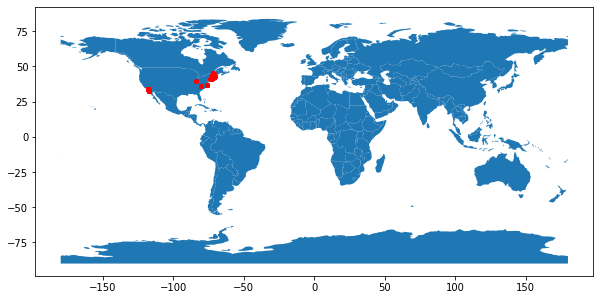

In [8]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

# Finding the Red Dots in the US

In [4]:
df = pd.read_csv('gps.csv', index_col=0)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df

,diffSecs,latitude,longitude,altitude,time,PK
1,1.607,42.354028,-71.079376,50.0,2011-12-15 18:17:01,0
2,1.189,42.354028,-71.079376,50.0,2011-12-15 18:17:02,0
3,0.899,42.354028,-71.079376,50.0,2011-12-15 18:17:03,0
4,1.134,42.354028,-71.079376,50.0,2011-12-15 18:17:04,0
5,0.798,42.354028,-71.079376,50.0,2011-12-15 18:17:05,0
...,...,...,...,...,...,...
8625852,1.246,42.438372,-71.669033,56.5,2012-03-02 19:30:44,1
8625853,0.759,42.438383,-71.669000,56.5,2012-03-02 19:30:45,1
8625854,0.967,42.438378,-71.669000,56.5,2012-03-02 19:30:46,1
8625855,0.908,42.438378,-71.669000,56.5,2012-03-02 19:30:47,1


In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [25]:
#pip install gpxpy

     |████████████████████████████████| 112kB 2.6MB/s eta 0:00:01
  Created wheel for gpxpy: filename=gpxpy-1.4.0-cp37-none-any.whl size=42814 sha256=63ce9addf5febba2c5048baef566d3792c879c7aa04d978f2e899f7b72722828
  Stored in directory: /Users/wesleykwong/Library/Caches/pip/wheels/77/d7/ee/cb4d7a151ce924c35e681377fb90a0b882f55bfd3c2c586739
Successfully built gpxpy
Note: you may need to restart the kernel to use updated packages.


In [27]:
#pip install folium

     |████████████████████████████████| 92kB 2.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
df

,diffSecs,latitude,longitude,altitude,time,PK,geometry
7858444,1.000,42.417369,-71.685555,77.300003,2012-01-21 13:26:30,1,POINT (-71.68555 42.41737)
5720725,0.997,42.389932,-71.041803,50.000000,2012-02-04 09:43:14,1,POINT (-71.04180 42.38993)
5250073,0.793,36.778273,-76.188582,0.000000,2011-12-27 12:27:40,1,POINT (-76.18858 36.77827)
4465002,0.535,42.372776,-70.993819,50.000000,2012-01-13 11:19:32,1,POINT (-70.99382 42.37278)
1876610,0.995,44.296731,-71.768900,250.199997,2012-01-03 12:55:25,1,POINT (-71.76890 44.29673)
...,...,...,...,...,...,...,...
4269842,1.003,36.838328,-76.065575,0.000000,2012-03-05 07:16:24,0,POINT (-76.06558 36.83833)
2478290,0.999,42.389932,-71.041803,50.000000,2012-02-22 11:30:56,0,POINT (-71.04180 42.38993)
7163610,1.005,42.385903,-70.986249,50.000000,2012-02-04 09:50:07,0,POINT (-70.98625 42.38590)
7315898,0.999,42.881854,-71.552818,64.300003,2012-03-07 13:00:55,0,POINT (-71.55282 42.88185)


In [35]:
lat_lon_df = df[['latitude', 'longitude']]
lat_lon_df.head()

,latitude,longitude
7858444,42.417369,-71.685555
5720725,42.389932,-71.041803
5250073,36.778273,-76.188582
4465002,42.372776,-70.993819
1876610,44.296731,-71.768900


In [40]:
points = list(lat_lon_df.apply(tuple, axis=1))
points

[(42.41736902, -71.68555481),
 (42.389931678772, -71.04180335998541),
 (36.778272986412, -76.1885815858841),
 (42.372776269912706, -70.99381864070891),
 (44.29673144, -71.76889967),
 (42.3732215166092, -70.9875798225403),
 (42.352085709571796, -72.6820814609528),
 (42.37387512, -70.99426361),
 (42.43772385, -71.68700698),
 (42.59466644, -72.55037293),
 (42.50321213, -72.53003011),
 (42.52836045, -72.60456186),
 (42.37960499, -70.98287577),
 (42.349210381507895, -71.8548023700714),
 (42.88908732, -71.54958577),
 (42.37388186, -70.99425092),
 (42.4352341890335, -71.67609214782709),
 (32.7070820331573, -117.16444194316901),
 (42.37397082, -70.99432734),
 (42.37323069, -70.98755888),
 (42.4384528398514, -71.66922569274901),
 (42.377754449844396, -70.97363770008091),
 (42.373945713043206, -70.9942531585693),
 (42.39670271, -71.07080615),
 (42.37213870000001, -70.99489990000001),
 (42.37405215, -70.98685147),
 (42.37771872, -70.97418056),
 (42.372776269912706, -70.99381864070891),
 (42.43836

In [43]:
import gpxpy
import gpxpy.gpx
import folium

ave_lat = sum(p[0] for p in points)/len(points)
ave_lon = sum(p[1] for p in points)/len(points)

# Load map centred on average coordinates
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

#add a markers
for each in points:  
    folium.Marker(each).add_to(my_map)

#fadd lines
#folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

# Save map
my_map.save("./map.html")